<a href="https://colab.research.google.com/github/mtoce/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3-dimensionality-reduction/Assig3_LS_DS_133_High_Dimensional_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from math import pi, sin, cos

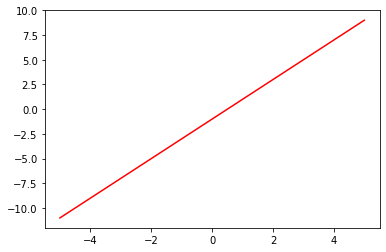

In [2]:
# a line at y = 2x -1 will pass the vertical line test
x = np.linspace(-5,5,1000)
y = 2*x - 1

plt.plot(x,y, color = 'red')
plt.show()

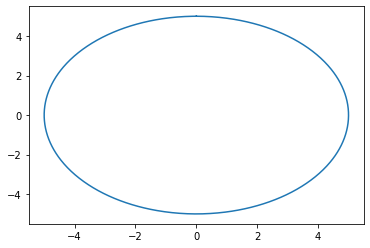

In [3]:
# a circle will not pass the vertical line test
r = 5
t = np.linspace(0, 2*np.pi, 1000)

x = r * np.sin(t)
y = r * np.cos(t)
plt.plot(x,y)
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

Because for certain x values, or in this case all, there exists more than 1 y-value. This means that we're getting two outputs for one input.

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Relation 2 is the only function because it has different x-values among it's points. If an x-value is repetitve, it means that there is another y-value and that violates the vertical line test. (assuming that there are no repeated values)

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

m: domain: 3d    ,    codomain: 3d
n: domain: 4d    ,    codomain: 2d

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

Yes, if it maps itself through a wormhole into another dimension.

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

\begin{align}
\text{Plug in these unit vectors: }
\begin{bmatrix} 1 \\ 0 \end{bmatrix}\hat{i} + \begin{bmatrix} 0 \\ 1 \end{bmatrix}\hat{j}
\\
\\
\text{Reorganized p-matrix: }\begin{bmatrix} 1 & 3 \\ -1 & 2 \end{bmatrix}
\\
\\
T(p) = \begin{bmatrix} 1 + 3(0) \\ -1 + 2(0) \end{bmatrix}\hat{i} + \begin{bmatrix} 0 + 3(1) \\ -(0) + 2(1) \end{bmatrix}\hat{j} = \begin{bmatrix} 1 \ \ \ 3 \\ -1 \ \ \ 2\end{bmatrix}
\\
\\
\text{Reorganized q-matrix: }\begin{bmatrix} 4 & 1 & 2 \\ -1 & 2 & 3 \\ 5 & 1 & -2 \end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [0]:
# traditional function method
def p(x1, x2):
  y1 = 1*x1 + 3 * x2
  y2 = -1 * x1 + 2 * x2
  return y1, y2

def q(x1,x2,x3):
  y1 = 4*x1 + x2 + 2*x3
  y2 = -x1 + 2*x2 + 3*x3
  y3 = 5*x1 + x2 - 2*x3
  return y1,y2,y3

In [5]:
p(1, 2)

(7, 3)

In [6]:
q(-1,2,4)

(6, 17, -11)

In [7]:
# vector-matrix multiplication method
p_input = np.array([[1],
               [2]])
p_trans = np.array([[1, 3],
                    [-1, 2]])
np.matmul(p_trans, p_input)

array([[7],
       [3]])

In [8]:
q_trans = np.array([[4, 1, 2],
                    [-1, 2, 3],
                    [5, 1, -2]])
q_input = np.array([[-1],
                    [2],
                    [4]])
np.matmul(q_trans, q_input)

array([[  6],
       [ 17],
       [-11]])

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

An Eigenvector is the Vector which linearly best fits all of the data based on the variance of our variables. The parameters, or variables, or vectors, need to shrink down their dimensions to fit onto the line of best-fit (1d). Variables with more variance will have more say in the eigenvector's direction / location and will have small eigenvalues. An eigenvalue is a scalar which will represent the amount a vector is stretched or shrunk when being normalized onto the eigenvector. A low eigenvalue means a low stretch, therefore higher variance in that variable. This means it is more of a principle component to that data, as well.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

The main challenge when working with high dimensional spaces is overfitting our data. The more dimensions, the easier it is to overfit your data. The way I think about it is each variable is like a term in a polynomial expression. Each term is going to add a more overfit best-fit line to our data, just like each column.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

The rule of thumb is that you should have 5 times the number of observations as the number of parameters.

# Principal Component Analysis

## 7.1 Code for loading and cleaning the 2013 national dataset from the [Housing Affordability Data System (HADS)](https://www.huduser.gov/portal/datasets/hads/hads.html) --housing data, can be found below. 

## Perform PCA on the processed dataset `national_processed` (Make sure you standardize your data!) and then make a scatterplot of PC1 against PC2. Some of our discussion and work around PCA with this dataset will continue during tomorrow's lecture and assignment.

Not only does this dataset have decent amount columns to begin with (99), but in preparing the data for PCA we have also [one-hot-encoded](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f#targetText=One%20hot%20encoding%20is%20a,the%20entry%20in%20the%20dataset.) all of the categorical variables. This has the effect of creating a new column for each individual category of each categorical variable. After processing this dataset has 64738 columns. --Das a lot of columns.

Don't worry too much about the mechanics of one-hot encoding right now, you will learn and experiment with a whole bunch of categorical encoding approaches in unit 2. 

The code below will read in the dataset and perform the one-hot encoding of the categorical variables. Start adding your PCA code at the bottom of the provided code.

In [9]:
from urllib.request import urlopen
from zipfile import ZipFile
from io import BytesIO
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read Natinal Data 
national_url = 'https://www.huduser.gov/portal/datasets/hads/hads2013n_ASCII.zip'
national_file = 'thads2013n.txt'

if os.path.exists(national_file):
    national = pd.read_csv(national_file)
else: 
    z_national = urlopen(national_url)
    zip_national = ZipFile(BytesIO(z_national.read())).extract(national_file)
    national = pd.read_csv(zip_national)

print(national.shape)
national.head()

(64535, 99)


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,'100003130103',82,'3','1',73738,956,15738,26213,40322,11067,2,2006,'1',1,40000,-6,'1',1,6,3117.394239,1,18021,'1',533,1,'1',169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,...,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,'1 Adequate','-5','2000-2009','1 Single Family','2 2BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','1 LTE 50% FMR','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','2 30 - 50% AMI','.','2 30% to 50%','-5','-5'
1,'100006110249',50,'5','3',55846,1100,17165,28604,45744,24218,4,1980,'1',1,130000,-6,'1',1,6,2150.725544,4,122961,'1',487,1,'1',245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,...,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','3 150-200% Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','3 GT FMR','4 60 - 80% AMI','4 60 - 80% AMI','6 100 - 120% AMI','4 60 - 80% AMI','7 120% AMI +','.','1 Less than 30%','-5','-5'
2,'100006370140',53,'5','3',55846,1100,13750,22897,36614,15470,4,1985,'1',1,150000,-6,'1',1,7,2213.789404,2,27974,'1',1405,1,'1',159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,...,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,'1 Adequate','-5','1980-1989','1 Single Family','4 4BR+','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 150-200% Poverty','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','2 50.1 - 100% FMR','4 60 - 80% AMI','5 80 - 100% AMI','6 100 - 120% AMI','4 60 - 80% AMI','4 60 - 80% AMI','.','3 50% or More','-5','-5'
3,'100006520140',67,'5','3',55846,949,13750,22897,36614,13964,3,1985,'1',1,200000,-6,'1',1,6,2364.585097,2,32220,'1',279,1,'1',179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,...,4,191.827492,3,161.926709,7,673.494512,4,247.752301,3,97.224801,5,404.382763,4,148.756610,3,'1 Adequate','-5','1980-1989','1 Single Family','3 3BR','1 Owner','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','4 200%+ Poverty','3 GT FMR','3 GT FMR','3 GT FMR','3 GT FMR','2 50.1 - 100% FMR','6 100 - 120% AMI','7 120% AMI +','7 120% AMI +','5 80 - 100% AMI','4 60 - 80% AMI','.','1 Less than 30%','-5','-5'
4,'100007130148',26,'1','3',60991,737,14801,24628,39421,15492,2,1980,'1',1,-6,-6,'2',100,4,2314.524902,2,96874,'1',759,5,'2',146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,96900,0,60991,14801,24628,39421,48792.8,16651.125000,...,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,55.308707,3,195.972115,3,102.98

In [10]:
# Look at datatypes
# a lot of object datatypes even though they seem to be strings of numbers.
national.dtypes

CONTROL            object
AGE1                int64
METRO3             object
REGION             object
LMED                int64
                    ...  
FMTINCRELAMICAT    object
FMTASSISTED        object
FMTBURDEN          object
FMTREGION          object
FMTSTATUS          object
Length: 99, dtype: object

In [11]:
# check for null values
national.isnull().sum().any()

False

In [12]:
# check for number of categorical vs numeric columns
cat_cols = national.columns[national.dtypes=='object']
num_cols = national.columns[national.dtypes!='object']

print(f'{len(cat_cols)} categorical columns')
print(f'{len(num_cols)} numerical columns')

32 categorical columns
67 numerical columns


In [13]:
# We're making a copy of our data in case we mess something up.
national_processed = national.copy()

# Categorically Encode our Variables:
# They need to all be numeric before we do PCA.
# https://pbpython.com/categorical-encoding.html

# Cast categorical columns to "category" data type
national_processed[cat_cols] = national_processed[cat_cols].astype('category')

national_processed.dtypes

CONTROL            category
AGE1                  int64
METRO3             category
REGION             category
LMED                  int64
                     ...   
FMTINCRELAMICAT    category
FMTASSISTED        category
FMTBURDEN          category
FMTREGION          category
FMTSTATUS          category
Length: 99, dtype: object

In [14]:
### what is codes ???

#-------------------------------------------------------------------------------
#-------------------------------------------------------------------------------
#-------------------------------------------------------------------------------
#-------------------------------------------------------------------------------

# Replace all category cell values with their numeric category codes
for col in cat_cols:
  national_processed[col] = national_processed[col].cat.codes

print(national_processed.shape)
national_processed.head()

(64535, 99)


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION,FMTSTATUS
0,0,82,2,0,73738,956,15738,26213,40322,11067,2,2006,0,1,40000,-6,1,1,6,3117.394239,1,18021,1,533,1,0,169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,...,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,1,0,5,1,2,0,4,4,4,4,3,1,1,1,1,1,1,1,1,1,2,0,2,0,0
1,1,50,4,2,55846,1100,17165,28604,45744,24218,4,1980,0,1,130000,-6,1,1,6,2150.725544,4,122961,1,487,1,0,245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,...,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,1,0,3,1,4,0,3,4,4,3,4,2,2,2,1,3,3,3,5,3,7,0,1,0,0
2,2,53,4,2,55846,1100,13750,22897,36614,15470,4,1985,0,1,150000,-6,1,1,7,2213.789404,2,27974,1,1405,1,0,159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,...,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,1,0,3,1,4,0,4,4,4,4,3,2,2,2,1,2,3,4,5,3,4,0,3,0,0
3,3,67,4,2,55846,949,13750,22897,36614,13964,3,1985,0,1,200000,-6,1,1,6,2364.585097,2,32220,1,279,1,0,179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,...,4,191.827492,3,161.926709,7,673.494512,4,247.752301,3,97.224801,5,404.382763,4,148.756610,3,1,0,3,1,3,0,4,4,4,4,4,2,2,2,2,2,5,6,6,4,4,0,1,0,0
4,4,26,0,2,60991,737,14801,24628,39421,15492,2,1980,0,1,-6,-6,2,100,4,2314.524902,2,96874,1,759,5,1,146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,96900,0,60991,14801,24628,39421,48792.8,16651.125000,...,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,1,1,3,5,2,1,3,3,3,3,4,2,2,2,2,3,2,2,2,2,7,1,1,0,0


In [15]:
# Now we only ahve numeric columns (ints and floats)
national_processed.dtypes

CONTROL            int32
AGE1               int64
METRO3              int8
REGION              int8
LMED               int64
                   ...  
FMTINCRELAMICAT     int8
FMTASSISTED         int8
FMTBURDEN           int8
FMTREGION           int8
FMTSTATUS           int8
Length: 99, dtype: object

In [0]:
# Normally, we would start by removing our label column (our y variable column)
# from the dataset, however, we are simply reducing this dataset with all its
# columns to see its highest variance columns in pc1 and pc2

In [0]:
from numpy import array
from numpy import mean
from numpy import std
from numpy import cov
from numpy.linalg import eig

In [35]:
national_processed = national_processed.drop(['FMTSTATUS'], axis=1)
national_processed.head()

,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVPCT,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION
0,0,82,2,0,73738,956,15738,26213,40322,11067,2,2006,0,1,40000,-6,1,1,6,3117.394239,1,18021,1,533,1,0,169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,0,-9,73738,15738,26213,40322,51616.6,20234.571429,...,251.885876,4,72.898038,2,48.402635,2,290.250487,4,84.001102,2,37.077624,2,222.339102,4,64.346936,2,1,0,5,1,2,0,4,4,4,4,3,1,1,1,1,1,1,1,1,1,2,0,2,0
1,1,50,4,2,55846,1100,17165,28604,45744,24218,4,1980,0,1,130000,-6,1,1,6,2150.725544,4,122961,1,487,1,0,245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,123000,-9,55846,17165,28604,45744,55846.0,19911.400000,...,218.791183,4,120.424656,3,103.094063,6,275.768999,4,151.785764,3,65.388468,4,174.909320,3,96.271680,2,1,0,3,1,4,0,3,4,4,3,4,2,2,2,1,3,3,3,5,3,7,0,1,0
2,2,53,4,2,55846,1100,13750,22897,36614,15470,4,1985,0,1,150000,-6,1,1,7,2213.789404,2,27974,1,1405,1,0,159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,28000,-9,55846,13750,22897,36614,44676.8,19937.500000,...,355.418791,4,124.962016,3,109.452905,6,458.339239,4,161.147910,3,65.946449,4,276.153890,4,97.093197,2,1,0,3,1,4,0,4,4,4,4,3,2,2,2,1,2,3,4,5,3,4,0,3,0
3,3,67,4,2,55846,949,13750,22897,36614,13964,3,1985,0,1,200000,-6,1,1,6,2364.585097,2,32220,1,279,1,0,179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,0,-9,55846,13750,22897,36614,44676.8,17875.000000,...,521.467459,4,191.827492,3,161.926709,7,673.494512,4,247.752301,3,97.224801,5,404.382763,4,148.756610,3,1,0,3,1,3,0,4,4,4,4,4,2,2,2,2,2,5,6,6,4,4,0,1,0
4,4,26,0,2,60991,737,14801,24628,39421,15492,2,1980,0,1,-6,-6,2,100,4,2314.524902,2,96874,1,759,5,1,146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,96900,0,60991,14801,24628,39421,48792.8,16651.125000,...,195.972115,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,55.308707,3,195.972115,3,102.985075,3,1,1,3,5,2,1,3,3,3,3,4,2,2,2,2,3,2,2,2,2,7,1,1,0


In [36]:
# calculate mean of each column
means = mean(national_processed.T, axis=1)
means

CONTROL                32267.000000
AGE1                      47.968932
METRO3                     1.227179
REGION                     1.394406
LMED                   68109.744309
                           ...     
FMTCOSTMEDRELAMICAT        2.770900
FMTINCRELAMICAT            3.996715
FMTASSISTED                0.478237
FMTBURDEN                  1.497823
FMTREGION                  0.175967
Length: 98, dtype: float64

In [43]:
# center data around 0 by subtracting mean from each value in columns
center_data = national_processed - means
center_data.head()

,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVPCT,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION
0,-32267.0,34.031068,0.772821,-1.394406,5628.255691,-208.395181,-1974.125436,-3298.032076,-5885.56763,-4919.664229,-0.660308,39.567165,-0.068769,-0.06536,-102032.790532,-0.541567,-0.320663,-13.889052,0.368792,1232.198780,-0.886015,-43334.837623,-0.000496,-528.613744,-0.920973,-0.424405,-14.099576,145.876970,-876.988235,-1271.003673,-1000.239417,-791.708434,-44910.928117,-3.483738,5628.255691,-1974.125436,-3298.032076,-5885.56763,-2027.317778,-663.388086,...,-140.905022,1.473712,-64.753004,-0.424901,-68.006076,-2.501278,-190.872563,1.425242,-81.982589,-0.48899,-43.583627,-1.7709,-102.422172,1.549624,-51.483518,-0.328922,-0.000496,-0.333044,2.740947,-0.921252,-0.61156,-0.424405,0.893159,0.854792,0.806322,0.930704,0.100922,-0.376307,-0.424901,-0.48899,-0.328922,-1.082033,-1.949144,-2.162997,-2.501278,-1.7709,-1.996715,-0.478237,0.502177,-0.175967
1,-32266.0,2.031068,2.772821,0.605594,-12263.744309,-64.395181,-547.125436,-907.032076,-463.56763,8231.335771,1.339692,13.567165,-0.068769,-0.06536,-12032.790532,-0.541567,-0.320663,-13.889052,0.368792,265.530086,2.113985,61605.162377,-0.000496,-574.613744,-0.920973,-0.424405,62.233757,-9.539697,-357.935643,-404.410803,-372.473445,-347.876666,78089.071883,-3.483738,-12263.744309,-547.125436,-907.032076,-463.56763,2202.082222,-986.559515,...,-173.999715,1.473712,-17.226386,0.575099,-13.314648,1.498722,-205.354051,1.425242,-14.197927,0.51101,-15.272783,0.2291,-149.851954,0.549624,-19.558774,-0.328922,-0.000496,-0.333044,0.740947,-0.921252,1.38844,-0.424405,-0.106841,0.854792,0.806322,-0.069296,1.100922,0.623693,0.575099,0.51101,-0.328922,0.917967,0.050856,-0.162997,1.498722,0.2291,3.003285,-0.478237,-0.497823,-0.175967
2,-32265.0,5.031068,2.772821,0.605594,-12263.744309,-64.395181,-3962.125436,-6614.032076,-9593.56763,-516.664229,1.339692,18.567165,-0.068769,-0.06536,7967.209468,-0.541567,-0.320663,-13.889052,1.368792,328.593945,0.113985,-33381.837623,-0.000496,343.386256,-0.920973,-0.424405,-24.099576,-30.373030,-332.183216,-301.427202,-322.562489,-338.839977,-16910.928117,-3.483738,-12263.744309,-3962.125436,-6614.032076,-9593.56763,-8967.117778,-960.459515,...,-37.372107,1.473712,-12.689026,0.575099,-6.955806,1.498722,-22.783811,1.425242,-4.835781,0.51101,-14.714802,0.2291,-48.607384,1.549624,-18.737257,-0.328922,-0.000496,-0.333044,0.740947,-0.921252,1.38844,-0.424405,0.893159,0.854792,0.806322,0.930704,0.100922,0.623693,0.575099,0.51101,-0.328922,-0.082033,0.050856,0.837003,1.498722,0.2291,0.003285,-0.478237,1.502177,-0.175967
3,-32264.0,19.031068,2.772821,0.605594,-12263.744309,-215.395181,-3962.125436,-6614.032076,-9593.56763,-2022.664229,0.339692,18.567165,-0.068769,-0.06536,57967.209468,-0.541567,-0.320663,-13.889052,0.368792,479.389638,0.113985,-29135.837623,-0.000496,-782.613744,-0.920973,-0.424405,-4.099576,2.793637,53.281187,277.115133,123.298236,4.835079,-44910.928117,-3.483738,-12263.744309,-3962.125436,-6614.032076,-9593.56763,-8967.117778,-3022.959515,...,128.676561,1.473712,54.176450,0.575099,45.517998,2.498722,192.371462,1.425242,81.768611,0.51101,16.563550,1.2291,79.621489,1.549624,3

In [38]:
# std for each column
stdev = std(national_processed.T, axis = 1)
stdev

CONTROL                18629.649809
AGE1                      22.869197
METRO3                     1.269450
REGION                     1.050106
LMED                   12371.081326
                           ...     
FMTCOSTMEDRELAMICAT        1.975247
FMTINCRELAMICAT            2.562785
FMTASSISTED                0.674258
FMTBURDEN                  0.913925
FMTREGION                  0.380792
Length: 98, dtype: float64

In [40]:
# Standardized data is the centered data over its deviation
standard_data = center_data / stdev
standard_data.head()

ERROR! Session/line number was not unique in database. History logging moved to new session 65


,CONTROL,AGE1,METRO3,REGION,LMED,FMR,L30,L50,L80,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,VACANCY,TENURE,NUNITS,ROOMS,WEIGHT,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,TOTSAL,ASSISTED,GLMED,GL30,GL50,GL80,APLMED,ABL30,...,COST08RELPOVPCT,COST08RELPOVCAT,COST08RELFMRPCT,COST08RELFMRCAT,COST12RELAMIPCT,COST12RELAMICAT,COST12RELPOVPCT,COST12RELPOVCAT,COST12RELFMRPCT,COST12RELFMRCAT,COSTMedRELAMIPCT,COSTMedRELAMICAT,COSTMedRELPOVPCT,COSTMedRELPOVCAT,COSTMedRELFMRPCT,COSTMedRELFMRCAT,FMTZADEQ,FMTMETRO3,FMTBUILT,FMTSTRUCTURETYPE,FMTBEDRMS,FMTOWNRENT,FMTCOST06RELPOVCAT,FMTCOST08RELPOVCAT,FMTCOST12RELPOVCAT,FMTCOSTMEDRELPOVCAT,FMTINCRELPOVCAT,FMTCOST06RELFMRCAT,FMTCOST08RELFMRCAT,FMTCOST12RELFMRCAT,FMTCOSTMEDRELFMRCAT,FMTINCRELFMRCAT,FMTCOST06RELAMICAT,FMTCOST08RELAMICAT,FMTCOST12RELAMICAT,FMTCOSTMEDRELAMICAT,FMTINCRELAMICAT,FMTASSISTED,FMTBURDEN,FMTREGION
0,-1.732024,1.488075,0.608784,-1.327872,0.454953,-0.528766,-0.444470,-0.445262,-0.553127,-0.681429,-0.603700,1.504196,-0.271749,-0.142292,-0.409728,-0.26814,-0.518234,-0.253701,0.193641,0.989256,-0.345248,-0.582421,-0.001189,-0.538157,-0.626460,-0.858681,-0.108318,1.002403,-0.524572,-0.489431,-0.511002,-0.535753,-0.693001,-0.774303,0.454953,-0.444470,-0.445262,-0.553127,-0.100276,-0.139349,...,-0.286129,0.448213,-0.508180,-0.588115,-0.524716,-1.139197,-0.294200,0.432580,-0.487463,-0.685212,-0.580668,-0.896546,-0.272848,0.472927,-0.526199,-0.452728,-0.001189,-0.706647,1.728565,-0.627170,-0.612264,-0.858681,0.676610,0.649838,0.615731,0.703541,0.071352,-0.518776,-0.588115,-0.685212,-0.452728,-1.091609,-0.956874,-1.028145,-1.139197,-0.896546,-0.779119,-0.709278,0.549473,-0.462107
1,-1.731970,0.088812,2.184270,0.576698,-0.991324,-0.163391,-0.123184,-0.122457,-0.043566,1.140132,1.224839,0.515773,-0.271749,-0.142292,-0.048319,-0.26814,-0.518234,-0.253701,0.193641,0.213178,0.823743,0.827974,-0.001189,-0.584987,-0.626460,-0.858681,0.478101,-0.065553,-0.214100,-0.155728,-0.190289,-0.235410,1.204959,-0.774303,-0.991324,-0.123184,-0.122457,-0.043566,0.108920,-0.207233,...,-0.353333,0.448213,-0.135192,0.796007,-0.102732,0.682587,-0.316521,0.432580,-0.084420,0.716067,-0.203481,0.115986,-0.399199,0.167739,-0.199905,-0.452728,-0.001189,-0.706647,0.467274,-0.627170,1.390040,-0.858681,-0.080937,0.649838,0.615731,-0.052382,0.778350,0.859820,0.796007,0.716067,-0.452728,0.926091,0.024966,-0.077478,0.682587,0.115986,1.171883,-0.709278,-0.544709,-0.462107
2,-1.731917,0.219993,2.184270,0.576698,-0.991324,-0.163391,-0.892063,-0.892949,-0.901606,-0.071564,1.224839,0.705854,-0.271749,-0.142292,0.031993,-0.26814,-0.518234,-0.253701,0.718708,0.263808,0.044416,-0.448652,-0.001189,0.349585,-0.626460,-0.858681,-0.185141,-0.208710,-0.198696,-0.116072,-0.164791,-0.229295,-0.260945,-0.774303,-0.991324,-0.892063,-0.892949,-0.901606,-0.443533,-0.201751,...,-0.075890,0.448213,-0.099583,0.796007,-0.053669,0.682587,-0.035118,0.432580,-0.028753,0.716067,-0.196046,0.115986,-0.129488,0.472927,-0.191508,-0.452728,-0.001189,-0.706647,0.467274,-0.627170,1.390040,-0.858681,0.676610,0.649838,0.615731,0.703541,0.071352,0.859820,0.796007,0.716067,-0.452728,-0.082759,0.024966,0.397856,0.682587,0.115986,0.001282,-0.709278,1.643655,-0.462107
3,-1.731863,0.832170,2.184270,0.576698,-0.991324,-0.546527,-0.892063,-0.892949,-0.901606,-0.280162,0.310570,0.705854,-0.271749,-0.142292,0.232776,-0.26814,-0.518234,-0.253701,0.193641,0.384872,0.044416,-0.391586,-0.001189,-0.796742,-0.626460,-0.858681,-0.031494,0.019197,0.031870,0.106710,0.062991,0.003272,-0.693001,-0.774303,-0.991324,-0.892063,-0.892949,-0.901606,-0.443533,-0.634993,...,0.261297,0.448213,0.425176,0.796007,0.351204,1.138032,0.296510,0.432580,0.486190,0.716067,0.220677,0.622252,0.212108,0.472927,0.336529,0.923669,-0.001189,-0.706647,0.467274,-0.627170,0.388888,-0.858681,0.676610,0.649838,0.615731,0.703541,0.778350,0.859820,0.796007,0.716067,0.923669,-0.082759,1.006807,1.348523,1.138032,0.622252,0.001282,-0.709278,-0.544709,-0.462107
4,-1.7

In [41]:
# make oue covariance matrix of the standard data
cov_matrix = cov(standard_data.T)
cov_matrix

array([[ 1.0000155 ,  0.01075555,  0.02227271, ...,  0.19469617,
         0.0236342 ,  0.01775892],
       [ 0.01075555,  1.0000155 ,  0.07690262, ...,  0.01147914,
         0.3103764 , -0.00355557],
       [ 0.02227271,  0.07690262,  1.0000155 , ..., -0.19744768,
        -0.08677012, -0.05644554],
       ...,
       [ 0.19469617,  0.01147914, -0.19744768, ...,  1.0000155 ,
         0.2796445 ,  0.03241822],
       [ 0.0236342 ,  0.3103764 , -0.08677012, ...,  0.2796445 ,
         1.0000155 ,  0.02305213],
       [ 0.01775892, -0.00355557, -0.05644554, ...,  0.03241822,
         0.02305213,  1.0000155 ]])

In [0]:
values, vectors = eig(cov_matrix)
values

In [0]:
vectors

In [0]:
projected = vectors.T.dot(standard_data.T)
projected

In [54]:
# Principal Component Analysis
from numpy import array
from sklearn.decomposition import PCA: \n", Z)
# create the PCA instance
pca = PCA(2)
# fit on data
pca.fit(standard_data)
# access values and vectors
# print("\n Eigenvectors: \n", pca.components_)
# print("\n Eigenvalues: \n",pca.explained_variance_)
# transform data
B = pca.transform(standard_data)
# print("\n Projected Data: \n", B)


 Standardized Data: 
 [[-1.73202397  1.48807451  0.60878419 ... -0.70927797  0.54947295
  -0.46210707]
 [-1.73197029  0.08881241  2.18426992 ... -0.70927797 -0.54470863
  -0.46210707]
 [-1.73191661  0.21999323  2.18426992 ... -0.70927797  1.64365453
  -0.46210707]
 ...
 [ 1.73191661 -1.09181499 -0.17895868 ...  0.773833    1.64365453
   2.16400067]
 [ 1.73197029  0.39490099 -0.96670154 ...  0.773833   -0.54470863
   2.16400067]
 [ 1.73202397  0.78844346  1.39652706 ...  0.773833   -0.54470863
  -0.46210707]]

 Eigenvectors: 
 [[-0.01762294  0.04564172  0.00224448 -0.0056805   0.04142715  0.08969161
   0.06498292  0.0649871   0.06422065  0.06147403  0.08585244  0.01801879
  -0.05896537 -0.01528452  0.13234213 -0.05711476 -0.03969967 -0.02559715
   0.09915137  0.02420272  0.06848524  0.10804133  0.02549375  0.12591589
  -0.0686994  -0.09686185  0.09495694  0.06829523  0.13890808  0.13843111
   0.13897851  0.138511    0.0905027  -0.07741872  0.04142715  0.06498292
   0.0649871   0.064220

In [55]:
R = pd.DataFrame(B)
R.head()

,0,1
0,-2.576570,-1.376127
1,2.040643,-0.988061
2,1.215270,0.370168
3,2.821837,1.723711
4,-1.570106,-0.878362


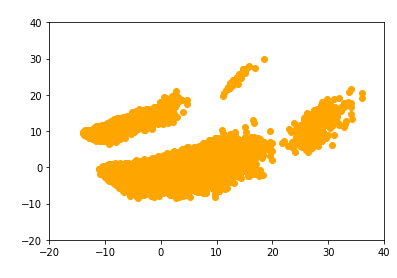

In [64]:
plt.scatter(R[0], R[1], color='orange')
plt.title('Housing Data PCA(2)', color='w')
plt.xlim(-20,40)
plt.ylim(-20,40)
plt.xlabel('PC1', color='w')
plt.ylabel('PC2', color='w')
plt.show()

# Stretch Goals

## 1) Perform further data exploration on the HADS national dataset (the version before we one-hot encoded it) Make scatterplots and see if you can see any resemblance between the original scatterplots and the plot of the principal components that you made in 7.1. 

(You may or may not not see very much resemblance depending on the variables you choose, and that's ok!)

## 2) Study "Scree Plots" and then try and make one for your PCA dataset. How many principal conponents do you need to retain in order for your PCs to contain 90% of the explained variance? 

We will present this topic formally at the beginning of tomorrow's lecture, so if you figure this stretch goal out, you're ahead of the game. 

## 3) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

Prioritize self-study over this stretch goal if you are not semi-comfortable with the topics of PCA, Eigenvalues, and Eigenvectors.

![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)